## Evaluate Models

I believe Logistical regression will be the superior model based on initial research and the number of features being evaluated. 

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

#### Set up vairiables to be used in Fit Determination Function 

In [20]:
index = []
scores = {'Train Score': [], "Test Score": [], 'Test Train Difference': [], 'Scaler': []}
scalers = ["none", StandardScaler(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]
models = [LinearRegression(),
          LogisticRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(),
          RandomForestClassifier(),
          ExtraTreesRegressor(),
          ExtraTreesClassifier(),
          AdaBoostRegressor(),
          AdaBoostClassifier()]

#### Define Function to Test Models and Scalers

In [3]:
def test_model(data):
    for scaler in scalers:
        global index
        global scores
        if scaler != "none":
            scaler.fit(X_train)
            X_train_scaled = scaler.transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled = X_train
            X_test_scaled = X_test
        data = X_train_scaled, X_test_scaled, y_train, y_test
        for model in models:
            reg = model.fit(X_train_scaled, y_train)
            y_pred = reg.predict(X_test_scaled)
            scores["Train Score"].append(reg.score(X_train_scaled, y_train))
            scores["Test Score"].append(reg.score(X_test_scaled, y_test))
            scores["Test Train Difference"].append((reg.score(X_train_scaled, y_train)-(reg.score(X_test_scaled, y_test))))
            scores["Scaler"].append(scaler)
            index += [type(reg).__name__]


#### Get data and evaluate readiness for model
    * Find features and target 
    * Test for imbalance 

In [4]:
# Import the data
file_path = Path("Resources/lending_data.csv")
df = pd.read_csv(file_path)
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [5]:
# Check the number of occurrences per target value. The classes are unbalanced.
df["loan_status"].value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

#### Create X and Y | Reshape the data 

In [6]:
# Create X (features) and y (target) sets
X = df.drop("loan_status", axis=1)
y = df["loan_status"].values
print("Shape: ", X.shape, y.shape)

Shape:  (77536, 7) (77536,)


In [7]:
# Visualizations used in testing 
# for col in X.columns:
#     print(col)
#     plt.scatter(X[col], y)
#     plt.show()
# reg = LinearRegression().fit(X_train, y_train)
# print(reg.coef_)
# plt.bar(X.columns, reg.coef_)
# plt.show()
# reg = Lasso(max_iter=10000).fit(X_train, y_train)
# print(reg.coef_)
# plt.bar(X.columns, reg.coef_)
# plt.show()

#### Split data into Training and Testing sets 

In [8]:
# Split the data into training and testing sets
data = X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

#### Get to know our data

Training Data Score: 0.9331296646947465
Testing Data Score: 0.7807456142682481
[2.16103413e-02 7.79216318e-01 8.68852946e-02 3.38961395e-02
 1.81182199e-02 2.38044201e-05 6.02498818e-02]


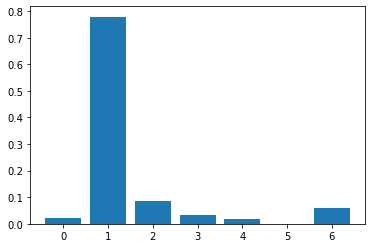

In [9]:
# setting Random forest as sample to view data 
classifier = RandomForestRegressor()
clf = classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

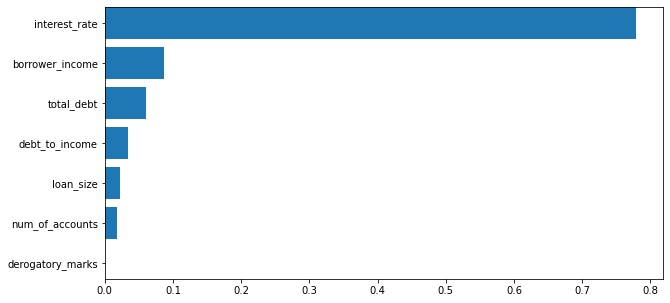

In [10]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [11]:
# Check the number of occurrences per target value in the training data
unique_elements_train, counts_elements_train = np.unique(y_train, return_counts=True)
print("Frequency of unique values in y_train:")
print(np.asarray((unique_elements_train, counts_elements_train)))

Frequency of unique values in y_train:
[[    0     1]
 [56244  1908]]


#### Check model/scaler combos for best fit

In [12]:
# call function test_model to test all models being considered
test_model(data)

#### Let's look at our Scaler and Model Results 

In [13]:
# Print by Training Score
df_scores = pd.DataFrame(scores, index=index)
df_scores.sort_values('Train Score', ascending=False).head(10)

,Train Score,Test Score,Test Train Difference,Scaler
RandomForestClassifier,0.997197,0.992210,0.004987,MaxAbsScaler()
RandomForestClassifier,0.997197,0.992158,0.005039,none
RandomForestClassifier,0.997197,0.991746,0.005451,MinMaxScaler()
RandomForestClassifier,0.997180,0.992004,0.005176,RobustScaler()
RandomForestClassifier,0.997180,0.991797,0.005382,StandardScaler()
LogisticRegression,0.994119,0.994170,-0.000052,RobustScaler()
LogisticRegression,0.994119,0.994170,-0.000052,StandardScaler()
LogisticRegression,0.992760,0.993087,-0.000327,MaxAbsScaler()
LogisticRegression,0.992760,0.993087,-0.000327,MinMaxScaler()
LogisticRegression,0.991918,0.992468,-0.000550,none


In [49]:
# Print by Testing Score
df_scores.sort_values('Test Score', ascending=False).head(10)

,Train Score,Test Score,Test Train Difference,Scaler,Test Train Magnitude
LogisticRegression,0.994119,0.994170,-0.000052,StandardScaler(),0.000052
LogisticRegression,0.994119,0.994170,-0.000052,RobustScaler(),0.000052
LogisticRegression,0.992760,0.993087,-0.000327,MinMaxScaler(),0.000327
LogisticRegression,0.992760,0.993087,-0.000327,MaxAbsScaler(),0.000327
LogisticRegression,0.991918,0.992468,-0.000550,none,0.000550
RandomForestClassifier,0.997197,0.992210,0.004987,MaxAbsScaler(),0.004987
RandomForestClassifier,0.997197,0.992158,0.005039,none,0.005039
RandomForestClassifier,0.997180,0.992004,0.005176,RobustScaler(),0.005176
RandomForestClassifier,0.997180,0.991797,0.005382,StandardScaler(),0.005382
RandomForestClassifier,0.997197,0.991746,0.005451,MinMaxScaler(),0.005451


In [52]:
# Print by Testing Score
df_scores['Test Train Magnitude'] = abs(df_scores['Test Train Difference'])
df_scores.sort_values('Test Train Magnitude').head(10)

,Train Score,Test Score,Test Train Difference,Scaler,Test Train Magnitude
LogisticRegression,0.994119,0.994170,-0.000052,StandardScaler(),0.000052
LogisticRegression,0.994119,0.994170,-0.000052,RobustScaler(),0.000052
LogisticRegression,0.992760,0.993087,-0.000327,MinMaxScaler(),0.000327
LogisticRegression,0.992760,0.993087,-0.000327,MaxAbsScaler(),0.000327
LogisticRegression,0.991918,0.992468,-0.000550,none,0.000550
AdaBoostRegressor,0.708467,0.705684,0.002783,MaxAbsScaler(),0.002783
AdaBoostRegressor,0.677158,0.673339,0.003819,none,0.003819
RandomForestClassifier,0.997197,0.992210,0.004987,MaxAbsScaler(),0.004987
RandomForestClassifier,0.997197,0.992158,0.005039,none,0.005039
RandomForestClassifier,0.997180,0.992004,0.005176,RobustScaler(),0.005176


#### Fit data to our model here we are fitting it using Logistic Regression
    For Logistic Regression the model performed better when data is scaled 
    Both the standard scaler and the robust scaler performed identically
    The Standard scaler is being used here. 

<span style='color:blue '> *Score provided = 0.9908171687990095* </span>

In [57]:
# Scale using best scaler
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# Train a Logistic Regression model print the model score
classifier = LogisticRegression(random_state= 42)
classifier.fit(X_train_s, y_train)
print(f'\033[1mLogistic Regression Results Tuned\033[0m \n')
print(f'\u001b[32mTraining Data Score: {classifier.score(X_train_s, y_train)}\033[0m')
print(f'\u001b[32mTesting Data Score: {classifier.score(X_test_s, y_test)}\033[0m\n')

# Cross validate to see if balancing will improve our model
scoring = ["accuracy", "balanced_accuracy"]
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
cv_result = cross_validate(clf, X_test_s, y_test, scoring=scoring)
print(f'\033[1mLogistic Regression Cross Validated Test Results Balanced\033[0m \n')
print(f'\u001b[32mTest Score Accuracy: {cv_result["test_accuracy"].mean()}\033[0m')
print(f'\u001b[32mTest Score Accuracy Balanced: {cv_result["test_balanced_accuracy"].mean()}\033[0m\n')

# Review classification report to verify selections
target_names = ["Yes", "No"]
clf.fit(X_train_s, y_train)
y_pred = clf.predict(X_test_s)
print(f'\033[1mLogistic Regression Classification Report\033[0m \n')
print(f'\u001b[32m{classification_report(y_test, y_pred, target_names=target_names)}\033[0m')

Logistic Regression Results Tuned 

Training Data Score: 0.9941188609162196
Testing Data Score: 0.9941704498555509

Logistic Regression Cross Validated Test Results Balanced 

Test Score Accuracy: 0.9939123267514247
Test Score Accuracy Balanced: 0.9952328767780418

Logistic Regression Classification Report 

              precision    recall  f1-score   support

         Yes       1.00      0.99      1.00     18792
          No       0.84      1.00      0.91       592

    accuracy                           0.99     19384
   macro avg       0.92      1.00      0.95     19384
weighted avg       0.99      0.99      0.99     19384



#### Fit data to our model here we are fitting it using Random Forest Regression
    Random Forest performed equally without regard for scaling 
    No scaling was performed on the data prior to fitting 
<span style='color:blue '> *Score provided = 0.9910751134956666* </span>


In [58]:
# Train a Random Forest Classifier model and print the model score
classifier = RandomForestClassifier(random_state=42, n_estimators= 500)
classifier.fit(X_train, y_train)
print(f'\033[1mRandom Forest Classifier Results Tuned\033[0m \n')
print(f'\u001b[32mTraining Data Score: {classifier.score(X_train, y_train)}\033[0m')
print(f'\u001b[32mTesting Data Score: {classifier.score(X_test, y_test)}\033[0m\n')

# Cross validate to see if balancing will improve our model
scoring = ["accuracy", "balanced_accuracy"]
clf = RandomForestClassifier(class_weight='balanced')
cv_result = cross_validate(clf, X_test, y_test, scoring=scoring)
print(f'\033[1mRandom Forest Classifier Results Balanced\033[0m \n')
print(f'\u001b[32mTest Score Accuracy: {cv_result["test_accuracy"].mean()}\033[0m')
print(f'\u001b[32mTest Score Accuracy Balanced: {cv_result["test_balanced_accuracy"].mean()}\033[0m\n')

# Review classification report to verify selections
target_names = ["Yes", "No"]
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'\033[1mRandom Forest Classifier Classification Report\033[0m \n')
print(f'\u001b[32m{classification_report(y_test, y_pred, target_names=target_names)}\033[0m')

Random Forest Classifier Results Tuned 

Training Data Score: 0.9971970009629936
Testing Data Score: 0.9921584812216261

Random Forest Classifier Results Balanced 

Test Score Accuracy: 0.9915393313428164
Test Score Accuracy Balanced: 0.9391971682889423

Random Forest Classifier Classification Report 

              precision    recall  f1-score   support

         Yes       1.00      0.99      1.00     18792
          No       0.85      0.92      0.88       592

    accuracy                           0.99     19384
   macro avg       0.92      0.96      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Conclusion
The initial prediction may be incorrect as the Random Forest Classifier produced better training scores and only slightly lower testing scores.
When we look at testing scores Logistic Regression performs better than Random Forest Classifier in all of its' variations. 
While Balancing improved the Logistic Regression model, predictably it did not improve the Random Forest Model. 
The Random Forest classifier produced identical results with and without scaling of any type. The Logistic regression model produced its best results when scaled by the standard scaler and the robust scaler, its results were improved again by balancing the data. 
None of the tested models appear to be experiencing overfitting, as a result no reduction in features were employed. 
The Random forest classifier model saw significant degredation when the data was balanced. 
When we look at the magnitude of the change between training and testing it appears that the initial prediction wins, Logistic regression experiences the lowest magnitude of change experienced between training and testing. 
The classification report(s) support these conclusions. 